In [3]:
import pandas  as pd
import numpy as np
from matplotlib import pyplot as plt

Load the data set

In [4]:
df = pd.read_csv('/Users/nikhil/Data/ML_examples/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

Question 1: How many different companies are represented in the data set?

In [5]:
df_queens = df[df['City']=='Queens']
jobs_queens = sum(df_queens['Job created'].fillna(0))
print('The number of job created for buisness in Queens is '+str(int(jobs_queens)))

The number of job created for buisness in Queens is 90


Question 2: What is the total number of jobs created for businesses in Queens?

In [6]:
company_emails = df['company email'].dropna()
company_emails_list = company_emails.tolist()
company_email_domains = []
for email in range (0,len(company_emails_list)):
    if '@' in company_emails_list[email]:
        at_index = company_emails_list[email].index('@')
        domain = company_emails_list[email][at_index+1:]
        company_email_domains.append(domain)
    else:
        company_email_domains.append(company_emails_list[email])
unique_domanins = np.unique(company_email_domains)
unique_domains_number = len(unique_domanins)
print('There are a total of '+str(unique_domains_number)+' unique email domains in the data set.')


There are a total of 361 unique email domains in the data set.


Question 3: How many different unique email domains names are there in the data set?

In [7]:
NTA = df['NTA'].dropna().tolist()
Unique_NTA,counts = np.unique(NTA,return_counts=True)
NTA_5_buisnesses = Unique_NTA[counts>=5]
Total_savings_mean = np.zeros(np.shape(NTA_5_buisnesses))
Total_jobs = np.zeros(np.shape(NTA_5_buisnesses))
Effective_date = np.zeros(np.shape(NTA_5_buisnesses))
for nta in range (0,len(NTA_5_buisnesses)):
    df_nta = df[df['NTA']==NTA_5_buisnesses[nta]]
    Total_savings_mean[nta] = df_nta['Total Savings'].mean()
    Jobs_created = df_nta['Job created'].dropna()
    Total_jobs[nta] = sum(Jobs_created)
NTA_data = np.c_[NTA_5_buisnesses,Total_savings_mean,Total_jobs]
NTA_csv = pd.DataFrame(NTA_data,columns=['NTA','Average total savings','Average jobs created'])
#NTA_csv.to_csv(path_to_save+'nta.csv')


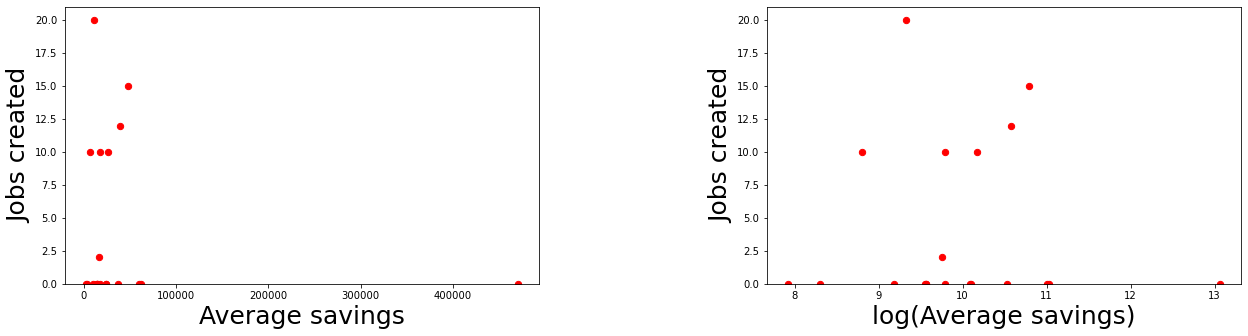

In [18]:

fig1=plt.figure()

plt.subplot(1,2,1)
plt.scatter(Total_savings_mean,Total_jobs,s=40,c='r')
plt.xlabel('Average savings',fontsize=25)
plt.ylabel('Jobs created',fontsize=25)
plt.ylim([0,None])

plt.subplot(1,2,2)
plt.scatter(np.log(Total_savings_mean),Total_jobs,s=40,c='r')
plt.xlabel('log(Average savings)',fontsize=25)
plt.ylabel('Jobs created',fontsize=25)
plt.ylim([0,None])

plt.tight_layout()
fig1.set_size_inches(20,5)

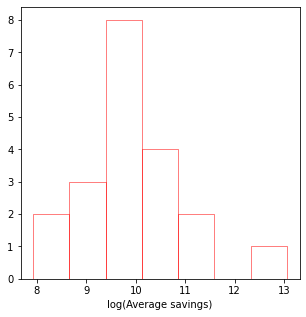

In [8]:
fig2=plt.figure()
plt.hist(np.log(Total_savings_mean),bins='auto',facecolor='None',edgecolor='r',linewidth=0.5)
plt.xlabel('log(Average savings)')
fig2.set_size_inches(5,5)